In [2]:
import pandas as pd
import numpy as np
from juanFunciones import *
import matplotlib
%matplotlib inline

In [3]:
types = {
 "event" : "category", 
 "person" : "category", 
 "url" : "category", 
 "sku" : "category", 
 "model" : "category", 
 "condition" : "category", 
 "storage" : "category", 
 "color" : "category", 
 "staticpage" : "category", 
 "campaign_source" : "category", 
 "search_engine" : "category", 
 "channel" : "category", 
 "new_vs_returning" : "category", 
 "city" : "category", 
 "region" : "category", 
 "country" : "category", 
 "device_type" : "category", 
 "screen_resolution" : "category", 
 "operating_system_version" : "category", 
 "browser_version" : "category",
    "os" : "category",
    "model_brand": "category",
    "label":"category"
}

In [4]:
df = pd.read_csv("trainDF.csv", parse_dates=["timestamp"], dtype=types).rename(columns={"Unnamed: 0": "index"})

/home/juan/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
labels = pd.read_csv("all/labels_training_set.csv")

In [92]:
labels.groupby("label").person.count()

label
0    18434
1      980
Name: person, dtype: int64

In [12]:
byEvents = df.groupby("event").person.value_counts()

In [14]:
peopleByConv = byEvents["conversion"]

In [24]:
dfConvs = df.set_index("person").loc[peopleByConv.index].join(peopleByConv).rename(columns={"person":"conversionCount"})

In [28]:
dfConvs = dfConvs.drop("index", axis=1)

In [30]:
dfConvs.head(3).columns

Index(['timestamp', 'event', 'url', 'sku', 'model', 'condition', 'storage',
       'color', 'skus', 'search_term', 'staticpage', 'campaign_source',
       'search_engine', 'channel', 'new_vs_returning', 'city', 'region',
       'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'label',
       'conversionCount'],
      dtype='object')

In [32]:
dfConvs = filteredDf(dfConvs, "conversion")

In [41]:
dfC = dfConvs.reset_index().join(pd.get_dummies(dfConvs.reset_index().drop(columns=["conversionCount","person", "timestamp"])))

In [44]:
dfC = dfC.drop(columns=['event', 'sku', 'model', 'condition', 'storage',
       'color', 'skus'])

In [80]:
y = dfC.label
X = dfC.drop(columns="label")

In [84]:
X = X.set_index(["person", "timestamp"]).reset_index()

In [85]:
X["week"] = X.timestamp.dt.week

In [86]:
X = X.drop(columns=["timestamp", "person", 'label_0.0', 'label_1.0'])

In [87]:
from sklearn.linear_model import SGDClassifier


In [88]:
from sklearn.model_selection import cross_val_score
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.86554622, 0.8767507 , 0.71428571, 0.8767507 , 0.28851541,
       0.85434174, 0.81741573, 0.84831461, 0.82816901, 0.8       ])

In [79]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
3534    0.0
3535    0.0
3536    0.0
3537    0.0
3538    0.0
3539    0.0
3540    0.0
3541    0.0
3542    0.0
3543    0.0
3544    0.0
3545    0.0
3546    0.0
3547    0.0
3548    0.0
3549    0.0
3550    0.0
3551    0.0
3552    0.0
3553    0.0
3554    0.0
3555    0.0
3556    0.0
3557    0.0
3558    0.0
3559    0.0
3560    0.0
3561    0.0
3562    0.0
3563    0.0
Name: label, Length: 3564, dtype: category
Categories (2, object): [0.0, 1.0]

In [6]:
dfComb = df[df.event.isin(["conversion", "checkout"])]

dfComb = dfComb.dropna(axis=1,how="all")

dfComb.set_index(["person", "timestamp"]).reset_index()
dfComb = dfComb.drop(columns=["timestamp", "person"])
y = dfComb.label

X=pd.get_dummies(dfComb)
X = X.drop(columns=["label_0.0", "label_1.0"])



In [7]:
X.columns

Index(['index', 'event_ad campaign hit', 'event_checkout', 'event_conversion',
       'event_search engine hit', 'event_searched products',
       'event_staticpage', 'event_viewed product', 'event_brand listing',
       'event_generic listing',
       ...
       'skus_9903,9945,15849,10156',
       'skus_9916,9974,10323,10014,9944,10084,9902,9930,10197,10295,10114,10156',
       'skus_9931,9902,9944,10084,10322,9974,10198,10156,10113,10296,10127,10338',
       'skus_9931,9902,9988,9944,10084,10322,15850,9974,10113,10154,10296,10127',
       'skus_9931,9988,9902,10322,9944,10084,9973,10254,15850,10113,10142,10338',
       'skus_9944,9931,9902,9987,9973,10084,10030,10322,10198,10100,10016,10254',
       'skus_9959,9974,10323,9944,10085,10100,10296,10140,10156,102,2709,1326',
       'skus_9959,9974,10323,9945,10100,10156,10140,10296,10127,102,2719,7715',
       'skus_9973,10323,10016,15849,9902,9944,10084,10029,9916,10224,10183,10338',
       'skus_9988,9931,9944,9902,10084,10197,9972,10

In [28]:
dfX = df.set_index(["person", "timestamp"]).reset_index()

dfX = dfX.drop(columns=["timestamp", "person"])

X=pd.get_dummies(filteredDf(dfX, "conversion"))


X = X.drop(columns=["label_0.0", "label_1.0"])

y = filteredDf(dfX, "conversion").label

In [ ]:
X.info()

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
scores = cross_val_score(clf, X, y, cv=10, scoring="roc_auc")
scores

array([0.330945  , 0.14215461, 0.64319061, 0.46711841, 0.8975905 ,
       0.57243801, 0.90265206, 0.55474043, 0.6420672 , 0.33404828])

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=3, scoring="roc_auc")
scores

KeyboardInterrupt: 

---
# una fila por obs

In [24]:
dfg = df.groupby("person").event.value_counts().unstack(1).fillna(0)

In [25]:
from sklearn.preprocessing import Binarizer

In [27]:
b = Binarizer().fit(dfg)

In [31]:
dfg = dfg.reset_index().join(pd.DataFrame(b.transform(dfg)))

In [34]:
dfg = dfg.set_index("person")

In [40]:
labels = labels.set_index("person")

In [53]:
X = dfg
y = labels.label

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, ElasticNetCV

In [44]:
clf = LogisticRegressionCV(scoring="roc_auc")

In [47]:
clf = ElasticNetCV()

In [ ]:
clf = LinearRegression()

In [54]:

scores = cross_val_score(clf, X, y, cv=3, scoring="roc_auc")
scores

/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.50514575, 0.50085354, 0.5051185 ])

---
Agrego features a cada persona

In [79]:
persons = filteredDf(df, "conversion").sort_values("person").person

newdf = filteredDf(df, "conversion").drop(columns=["person", "timestamp", "event", "label"])

dum = pd.get_dummies(newdf)

dum["person"] = persons

vals = dum.groupby("person").sum()

In [90]:
dfFilter = filteredDf(df, "checkout")
persons = dfFilter.sort_values("person").person

newdf = dfFilter.drop(columns=["person", "timestamp", "event", "label"])

dum = pd.get_dummies(newdf)

dum["person"] = persons

vals = dum.groupby("person").sum()
X2 = vals.drop(columns="index").join(X1, rsuffix="check")

In [85]:
X1 = vals.drop(columns="index").join(X)

In [86]:
clf = LinearRegression()

In [96]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [92]:
clf = RandomForestClassifier()

In [97]:
clf = ExtraTreesClassifier()

In [100]:
scores = cross_val_score(clf, X2, y, cv=3, scoring="roc_auc")
scores

/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.49531879, 0.52042211, 0.4994533 ])

---
# Cantidad de eventos por usuario

In [ ]:
eventCount = df.groupby("person").event.value_counts().unstack(1)

In [ ]:
labelsCount = labels.set_index("person").join(eventCount)

In [35]:
labelsCount = labelsCount.join(df.groupby("person").event.count())

In [36]:
labelsCount = labelsCount.sort_values("event")

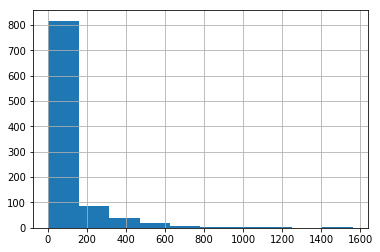

In [43]:
labelsCount[labelsCount["label"]==1].event.hist()

---
# gente que ya compro

In [49]:
peopleWhoConverted = df.groupby("event").person.value_counts()["conversion"].index

In [53]:
labels.groupby("label").person.count()

label
0    18434
1      980
Name: person, dtype: int64

In [63]:
labels.set_index("person").loc[peopleWhoConverted].label.value_counts()

0    1967
1     197
Name: label, dtype: int64